# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
#from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

635

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#create new dataframe to store city information 
city_data = pd.DataFrame([{'City':'','Cloudiness':'','Country':'','Date':'','Humidity':'','Lat':'','Lng':'','Max Temp':'','Wind Speed':''}])
#setting api key
api_key = weather_api_key

#query the open weather API
for index,city in enumerate (cities):
    city_name = city 
    url = "http://api.openweathermap.org/data/2.5/weather?q="
    target_url = url + city_name + "&appid=" + api_key
    response = requests.get(target_url).json()
    try:
        print(f"Processing Record {index} of Set {len(cities)} {response['name']}")
        
        #return values from API to the coressponding column in city data df
        city_data.loc[index, 'City'] = response['name']
        city_data.loc[index, 'Cloudiness'] = response['clouds']['all']
        city_data.loc[index, 'Country'] = response['sys']['country']
        city_data.loc[index, 'Date'] = response['dt']
        city_data.loc[index, 'Humidity'] = response['main']['humidity']
        city_data.loc[index, 'Lat'] = response['coord']['lat']
        city_data.loc[index, 'Lng'] = response['coord']['lon']
        city_data.loc[index, 'Max Temp'] = response['main']['temp_max']
        city_data.loc[index, 'Wind Speed'] = response['wind']['speed']
        
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")    
        
#Processing Record 1 of Set 1 | 

Processing Record 0 of Set 635 Saskylakh
Processing Record 1 of Set 635 Rocha
Processing Record 2 of Set 635 Hobart
Processing Record 3 of Set 635 Ichinohe
Processing Record 4 of Set 635 Hambantota
Processing Record 5 of Set 635 Vaini
Processing Record 6 of Set 635 Hong Kong
Processing Record 7 of Set 635 Río Bueno
Processing Record 8 of Set 635 Bambous Virieux
Processing Record 9 of Set 635 San Patricio
Processing Record 10 of Set 635 Bethel
Processing Record 11 of Set 635 Rikitea
Processing Record 12 of Set 635 Ixtapa
Processing Record 13 of Set 635 Skjervøy
Processing Record 14 of Set 635 Carnarvon
Processing Record 15 of Set 635 Constitución
Missing field/result... skipping.
Processing Record 17 of Set 635 Coruripe
Missing field/result... skipping.
Processing Record 19 of Set 635 Qaanaaq
Processing Record 20 of Set 635 Challapata
Processing Record 21 of Set 635 Les Escoumins
Processing Record 22 of Set 635 Punta Arenas
Processing Record 23 of Set 635 Trelew
Processing Record 24 of 

Processing Record 200 of Set 635 Balkhash
Processing Record 201 of Set 635 San
Processing Record 202 of Set 635 Mossamedes
Processing Record 203 of Set 635 Palmer
Processing Record 204 of Set 635 Gushikawa
Processing Record 205 of Set 635 Lázaro Cárdenas
Processing Record 206 of Set 635 Rafaela
Processing Record 207 of Set 635 Zapolyarnyy
Processing Record 208 of Set 635 Bandarbeyla
Processing Record 209 of Set 635 Alexandria
Processing Record 210 of Set 635 Soloneshnoye
Processing Record 211 of Set 635 Bathsheba
Processing Record 212 of Set 635 Ginir
Processing Record 213 of Set 635 Fort Saint James
Processing Record 214 of Set 635 Nanning
Missing field/result... skipping.
Processing Record 216 of Set 635 Mitú
Processing Record 217 of Set 635 Portland
Processing Record 218 of Set 635 Thompson
Processing Record 219 of Set 635 Oktyabr'skiy
Processing Record 220 of Set 635 Porosozero
Processing Record 221 of Set 635 Verkhoyansk
Processing Record 222 of Set 635 Port Hedland
Processing Rec

Processing Record 397 of Set 635 Tadine
Processing Record 398 of Set 635 Grand Bank
Processing Record 399 of Set 635 Hvolsvollur
Processing Record 400 of Set 635 Arlit
Processing Record 401 of Set 635 Batouri
Processing Record 402 of Set 635 Westport
Processing Record 403 of Set 635 Geraldton
Processing Record 404 of Set 635 Wuning
Processing Record 405 of Set 635 Eureka
Processing Record 406 of Set 635 Sribne
Processing Record 407 of Set 635 Homer
Processing Record 408 of Set 635 Andijan
Processing Record 409 of Set 635 Leh
Processing Record 410 of Set 635 Ambon City
Processing Record 411 of Set 635 Coari
Processing Record 412 of Set 635 Prince Albert
Processing Record 413 of Set 635 Den Helder
Processing Record 414 of Set 635 Chokurdakh
Processing Record 415 of Set 635 Srednekolymsk
Processing Record 416 of Set 635 Cherskiy
Processing Record 417 of Set 635 Wārāseonī
Processing Record 418 of Set 635 Angoche
Processing Record 419 of Set 635 Kedrovyy
Processing Record 420 of Set 635 San

Processing Record 594 of Set 635 Bemidji
Processing Record 595 of Set 635 Thinadhoo
Processing Record 596 of Set 635 Warrensburg
Processing Record 597 of Set 635 Nushki
Processing Record 598 of Set 635 Bima
Processing Record 599 of Set 635 Brae
Processing Record 600 of Set 635 San Antonio
Processing Record 601 of Set 635 Ketchikan
Processing Record 602 of Set 635 Ust-Kuyga
Processing Record 603 of Set 635 Quatre Cocos
Processing Record 604 of Set 635 Birjand
Processing Record 605 of Set 635 Birao
Processing Record 606 of Set 635 Urengoy
Processing Record 607 of Set 635 Olenegorsk
Processing Record 608 of Set 635 Houma
Processing Record 609 of Set 635 Ascension
Processing Record 610 of Set 635 João Pinheiro
Processing Record 611 of Set 635 Tamra
Missing field/result... skipping.
Processing Record 613 of Set 635 Chengde
Processing Record 614 of Set 635 Darhan
Processing Record 615 of Set 635 Zaozyornoye
Processing Record 616 of Set 635 Stromness
Missing field/result... skipping.
Missing 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
#Exporting the city data into a .csv.
city_data.to_csv("Output/fileOne.csv", index=False, header=True) #writes file as csv to folder

In [26]:
#filtering data 
nan_value = float("NaN")
city_data.replace("", nan_value, inplace=True)
city_data.dropna()
city_data

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Saskylakh,97.0,RU,1584232534,95.0,71.92,114.08,256.68,5.00
1,Rocha,84.0,UY,1584233262,83.0,-34.48,-54.33,292.14,3.56
2,Hobart,75.0,AU,1584232534,71.0,-42.88,147.33,290.37,5.10
3,Ichinohe,75.0,JP,1584233262,86.0,40.21,141.30,274.15,3.10
4,Hambantota,20.0,LK,1584232885,100.0,6.12,81.12,296.15,2.60
...,...,...,...,...,...,...,...,...,...
630,Urucará,100.0,BR,1584233145,96.0,-2.54,-57.76,297.10,1.95
631,Long,61.0,TH,1584233324,78.0,18.08,99.83,303.71,0.74
632,Steamboat Springs,75.0,US,1584233324,45.0,40.48,-106.83,280.15,0.70
633,Imbituba,75.0,BR,1584233324,65.0,-28.24,-48.67,299.15,4.10


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

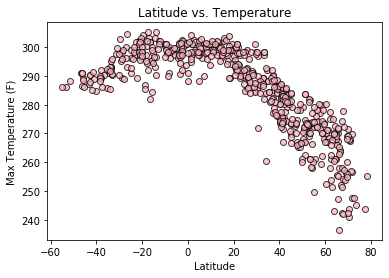

In [12]:
#Latitude vs. Temperature Plot
plt.scatter(city_data['Lat'], city_data["Max Temp"], marker="o", facecolors="lightpink", edgecolors="black", alpha=0.75)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Latitude vs. Temperature')
#saving out plot as an output png
plt.savefig('Output/Latvstemp.png')

#### Latitude vs. Humidity Plot

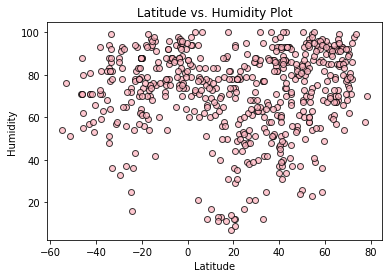

In [13]:
#Latitude vs. Humidity Plot
plt.scatter(city_data['Lat'], city_data["Humidity"], marker="o", facecolors="lightpink", edgecolors="black", alpha=0.75)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs. Humidity Plot')
#saving out plot as an output png
plt.savefig('Output/LatvsHumidity.png')

#### Latitude vs. Cloudiness Plot

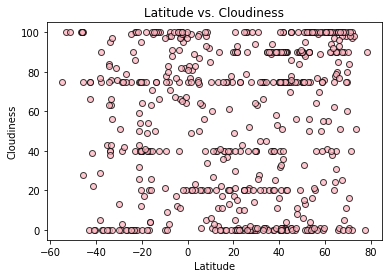

In [14]:
#Latitude vs. Humidity Plot
plt.scatter(city_data['Lat'], city_data["Cloudiness"], marker="o", facecolors="lightpink", edgecolors="black", alpha=0.75)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs. Cloudiness')
#saving out plot as an output png
plt.savefig('Output/LatvsCloudiness.png')

#### Latitude vs. Wind Speed Plot

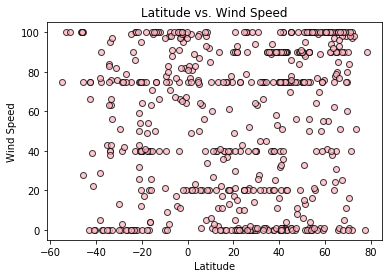

In [15]:
#Latitude vs. Wind Speed Plot
plt.scatter(city_data['Lat'], city_data["Cloudiness"], marker="o", facecolors="lightpink", edgecolors="black", alpha=0.75)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude vs. Wind Speed')
#saving out plot as an output png
plt.savefig('Output/Latvswindspeed.png')

## Linear Regression

In [31]:
# OPTIONAL: Create a function to create Linear Regression plots
city_data = city_data.dropna()
#changing data type
city_data[["Lat","Max Temp","Lng","Humidity","Cloudiness","Wind Speed"]] = city_data[["Lat","Max Temp","Lng","Humidity","Cloudiness","Wind Speed"]].astype(float)



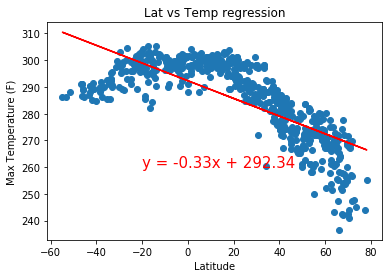

In [32]:
#Plotting regression lines for latitude vs max temp
x_values = city_data["Lat"]
y_values = city_data["Max Temp"]
#calling the linregress function 
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
#generating the line equation 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plotting the values 
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (-20,260), fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Lat vs Temp regression')
plt.show()
#printing results 
# print("The correlation coefficient is " + str(rvalue))
# print("The linear regression model is " + str(line_eq))

In [34]:
# Create Northern and Southern Hemisphere DataFrames by their latitu
Northern_df = city_data.loc[(city_data["Lat"] >= 0),:]
Southern_df = city_data.loc[(city_data["Lng"] <= 0 ),:]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

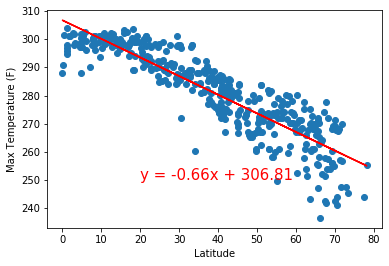

The correlation coefficient is -0.886244342822816
The linear regression model is y = -0.66x + 306.81


In [35]:
#Plotting regression lines for latitude vs max temp for  Northern Hemisphere 
x_values = Northern_df["Lat"]
y_values = Northern_df["Max Temp"]
#calling the linregress function 
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
#generating the line equation 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plotting the values 
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (20,250), fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.show()
#printing results 
print("The correlation coefficient is " + str(rvalue))
print("The linear regression model is " + str(line_eq))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

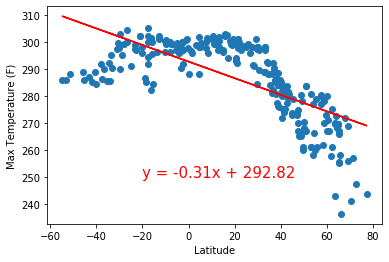

The correlation coefficient is -0.6931883968567645
The linear regression model is y = -0.31x + 292.82


In [36]:
#plotting Southern Hemisphere - Max Temp vs. Latitude Linear Regression
x_values = Southern_df["Lat"]
y_values = Southern_df["Max Temp"]
#calling the linregress function 
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
#generating the line equation 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plotting the values 
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (-20,250), fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.show()
#printing results 
print("The correlation coefficient is " + str(rvalue))
print("The linear regression model is " + str(line_eq))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

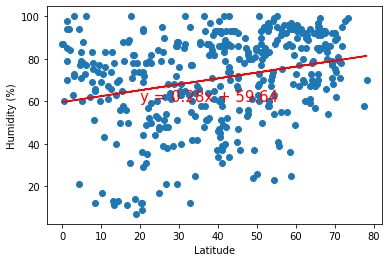

The correlation coefficient is 0.25970230971791103
The linear regression model is y = 0.28x + 59.64


In [37]:
#plotting Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
x_values = Northern_df["Lat"]
y_values = Northern_df["Humidity"]
#calling the linregress function 
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
#generating the line equation 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plotting the values 
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (20,60), fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()
#printing results 
print("The correlation coefficient is " + str(rvalue))
print("The linear regression model is " + str(line_eq))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

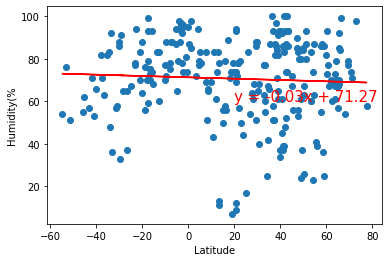

The correlation coefficient is -0.05207002000059401
The linear regression model is y = -0.03x + 71.27


In [38]:
#Plotting Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
x_values = Southern_df["Lat"]
y_values = Southern_df["Humidity"]
#calling the linregress function 
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
#generating the line equation 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plotting the values 
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (20,60), fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity(%')
plt.show()
#printing results 
print("The correlation coefficient is " + str(rvalue))
print("The linear regression model is " + str(line_eq))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

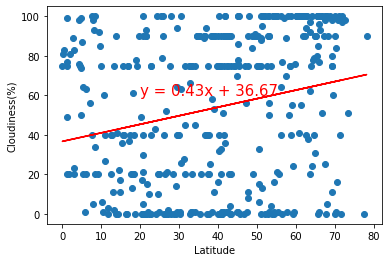

The correlation coefficient is 0.22797112383476859
The linear regression model is y = 0.43x + 36.67


In [50]:
#Plotting Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
x_values = Northern_df["Lat"]
y_values = Northern_df["Cloudiness"]
#calling the linregress function 
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
#generating the line equation 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plotting the values 
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (20,60), fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.show()
#printing results 
print("The correlation coefficient is " + str(rvalue))
print("The linear regression model is " + str(line_eq))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

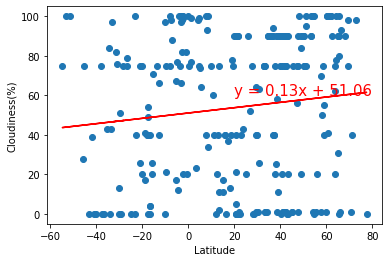

The correlation coefficient is 0.11671549828610361
The linear regression model is y = 0.13x + 51.06


In [48]:
#plotting Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
x_values = Southern_df["Lat"]
y_values = Southern_df["Cloudiness"]
#calling the linregress function 
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
#generating the line equation 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plotting the values 
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (20,60), fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.show()
#printing results 
print("The correlation coefficient is " + str(rvalue))
print("The linear regression model is " + str(line_eq))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

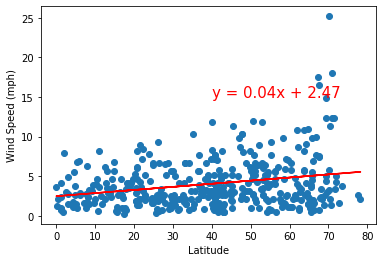

The correlation coefficient is 0.2528447274180277
The linear regression model is y = 0.04x + 2.47


In [46]:
#plotting Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
x_values = Northern_df["Lat"]
y_values = Northern_df["Wind Speed"]
#calling the linregress function 
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
#generating the line equation 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plotting the values 
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (40,15), fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()
#printing results 
print("The correlation coefficient is " + str(rvalue))
print("The linear regression model is " + str(line_eq))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

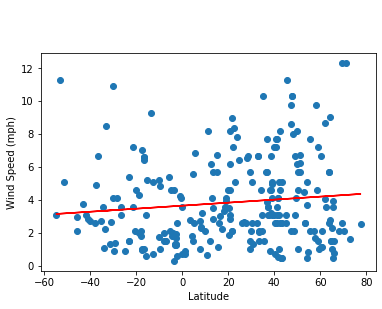

The correlation coefficient is 0.11285045962923969
The linear regression model is y = 0.01x + 3.65


In [44]:
#plotting Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
x_values = Southern_df["Lat"]
y_values = Southern_df["Wind Speed"]
#calling the linregress function 
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
#generating the line equation 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plotting the values 
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (20,15), fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()
#printing results 
print("The correlation coefficient is " + str(rvalue))
print("The linear regression model is " + str(line_eq))

# Data Analysis

1) I can notice that as the Latitude increases the temperature decreases from my plot of latitude vs temperature.
<br>
2) I can also notice that as the Latitude increases the Humididty increases.
<br>
3) I can also as the Latitude increases the Northern hemisphere cloudiness increases.
<br>
4) I can aslo notice theres not much of a relationship between windspeeds and the latitude and Longitude in the Southern Hemisphere. 
